**Juan José Solórzano Carrillo**


# REGRESIÓN LINEAL MÚLTIPLE

En el presente trabajo se implementan las diferentes librerías de Python para calcular un modelo de regresión lineal. Se utiliza el conjunto de datos Computer Hardware para comparar los resultados obtenidos en el artículo "Attributes of the Performance of Central Processing Units: A Relative Performance Prediction Model".


In [ ]:
#EJEMPLO PARA EL TRABAJO DE TAREA
 
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.formula.api as sn
from sklearn.model_selection import train_test_split
 
 
df_Machine = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/machine2.csv') # Carga el archivo .csv

#Transformación de variables 
df_Machine['CHAVG'] = (((df_Machine['CHMIN'] + df_Machine['CHMAX'])/2)+1).astype(int)
df_Machine['CACH']= df_Machine['CACH']#*pow(10,-1)
df_Machine['SPEED'] = 1/(df_Machine['MCYT'])
df_Machine['CHCAP'] = ((df_Machine['CHAVG']) * (df_Machine['SPEED']))*10
df_Machine['MAVG'] = (df_Machine['MMIN'] + df_Machine['MMAX'])/2 * pow(10,-3)
df_Machine['SQRtPERF'] = np.sqrt(df_Machine['RELPERF'])

df_Machine = df_Machine.loc[:,['MAVG','CACH','CHCAP','SQRtPERF']] # dataset de las variables que se utilizarán
#print(df_Machine)


(df_train,df_test) = train_test_split(df_Machine, test_size=0.5, train_size=0.5) # Conjunto de entrenamiento
 
model = sn.ols(formula = 'SQRtPERF ~ MAVG + CACH + CHCAP',data = df_train).fit() # Calculo del modelo de cuadrados mínimos
print(model.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:               SQRtPERF   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.583e+06
Date:                Wed, 05 May 2021   Prob (F-statistic):          1.18e-233
Time:                        06:39:19   Log-Likelihood:                 236.43
No. Observations:                 104   AIC:                            -464.9
Df Residuals:                     100   BIC:                            -454.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7810      0.003   1105.120      0.0

# RESULTADOS
En el modelo de regresión lineal que se calcula, se pude observar que:



> Los coeficientes: "MAVG", "CACH", "CHCAP" e "Intercept", corresponden a los valores de beta0, beta1, beta2 y beta3 del modelo de regresión lineal múltiple. Estos valores son muy cercanos a los calculados en el artículo antes mencionado.

> El valor de probabilidad para todos los coeficientes es: 0.000, con un valor de significancia de 0.005% existe evidencia significativa para rechazar la hipótesis nula (H0). Por lo tanto, existe una fuerte correlación de las variables.

> También se observan los rangos de los coeficientes calculados en el modelo. Con un 95% de confianza se observa que los verdaderos valores de estos coeficientes se encuentran dentro de este rango, es decir, el valor de "Intercept" está en el rango de: [3.778 - 3.791].

> El coeficiente de correlación "r" es 1, lo que significa que existe una fuerte correlación positiva.












> predicted = 8.930473776082211,    actual = 8.94427190999916
> predicted = 4.932030751886996,    actual = 4.898979485566356
> predicted = 4.276576583421774,    actual = 4.242640687119285
> predicted = 5.250241297063833,    actual = 5.291502622129181
> predicted = 6.5609968021918155,    actual = 6.557438524302
> predicted = 5.599544476579515,    actual = 5.5677643628300215
> predicted = 5.259227306793573,    actual = 5.291502622129181
> predicted = 7.678943866003488,    actual = 7.681145747868608
> predicted = 5.64023946658993,    actual = 5.656854249492381
> predicted = 5.5205571985705495,    actual = 5.477225575051661
> predicted = 6.830450690840447,    actual = 6.855654600401044
> predicted = 4.462619294036207,    actual = 4.47213595499958
> predicted = 27.36556603197689,    actual = 27.367864366808018
> predicted = 5.64023946658993,    actual = 5.656854249492381
> predicted = 4.415187865485443,    actual = 4.358898943540674
> predicted = 4.993931611485792,    actual = 5.0
> predict

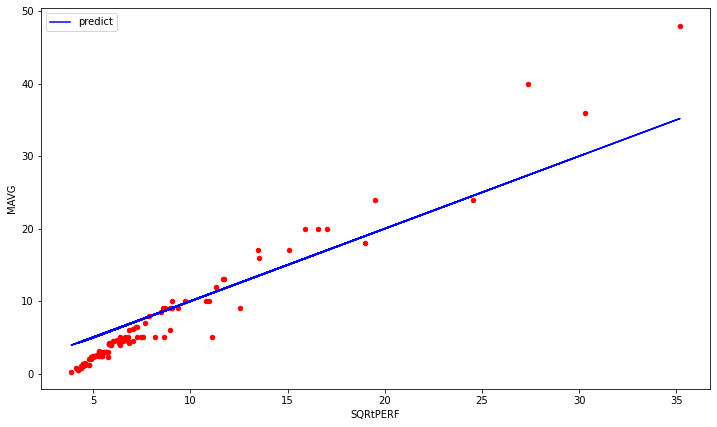

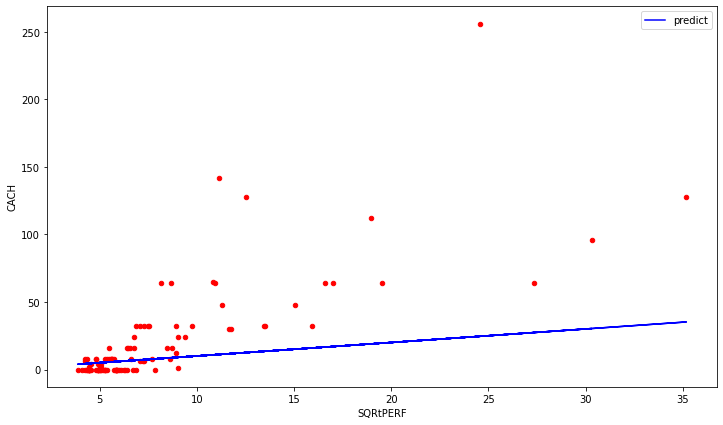

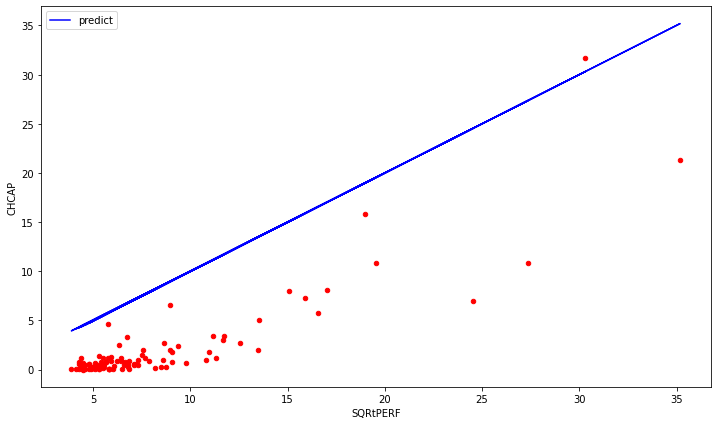

In [ ]:
#GRÁFICAS

df_train = df_train.loc[:,['MAVG','CACH','CHCAP','SQRtPERF']] 

predict = model.predict(df_train)


line_scatter = df_train
line_scatter['predict'] = predict


for i in range(len(df_train)):
    pre = predict.iloc[i]
    act = df_train['SQRtPERF'].iloc[i]
    print('> predicted = '+ str(pre) + ',    actual = '+ str(act))


lin = line_scatter.plot.line(x='SQRtPERF',y='predict',color = 'b')
line_scatter.plot.scatter(x='SQRtPERF',y='MAVG',color = 'r',ax = lin,figsize = (12,7))

lin1 = line_scatter.plot.line(x='SQRtPERF',y='predict',color = 'b')
line_scatter.plot.scatter(x='SQRtPERF',y='CACH',color = 'r',ax = lin1,figsize = (12,7))

lin2 = line_scatter.plot.line(x='SQRtPERF',y='predict',color = 'b')
line_scatter.plot.scatter(x='SQRtPERF',y='CHCAP',color = 'r',ax = lin2,figsize = (12,7))



> predicted = 8.930473776082211,    actual = 8.94427190999916
> predicted = 4.932030751886996,    actual = 4.898979485566356
> predicted = 4.276576583421774,    actual = 4.242640687119285
> predicted = 5.250241297063833,    actual = 5.291502622129181
> predicted = 6.5609968021918155,    actual = 6.557438524302
> predicted = 5.599544476579515,    actual = 5.5677643628300215
> predicted = 5.259227306793573,    actual = 5.291502622129181
> predicted = 7.678943866003488,    actual = 7.681145747868608
> predicted = 5.64023946658993,    actual = 5.656854249492381
> predicted = 5.5205571985705495,    actual = 5.477225575051661
> predicted = 6.830450690840447,    actual = 6.855654600401044
> predicted = 4.462619294036207,    actual = 4.47213595499958
> predicted = 27.36556603197689,    actual = 27.367864366808018
> predicted = 5.64023946658993,    actual = 5.656854249492381
> predicted = 4.415187865485443,    actual = 4.358898943540674
> predicted = 4.993931611485792,    actual = 5.0
> predict

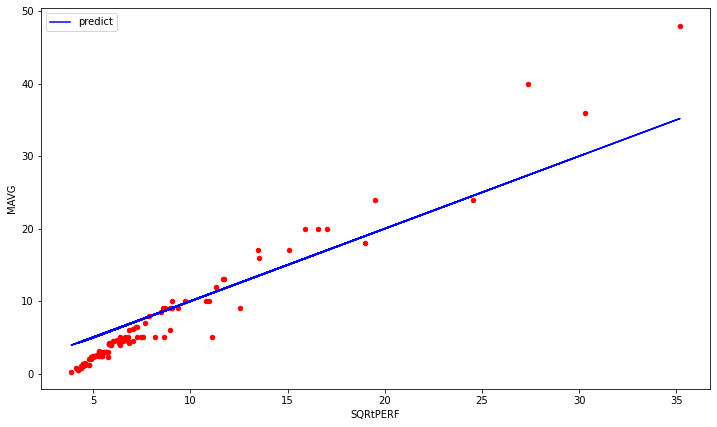

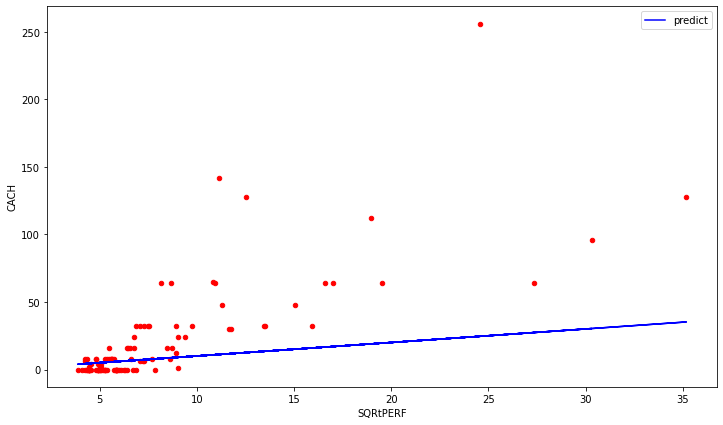

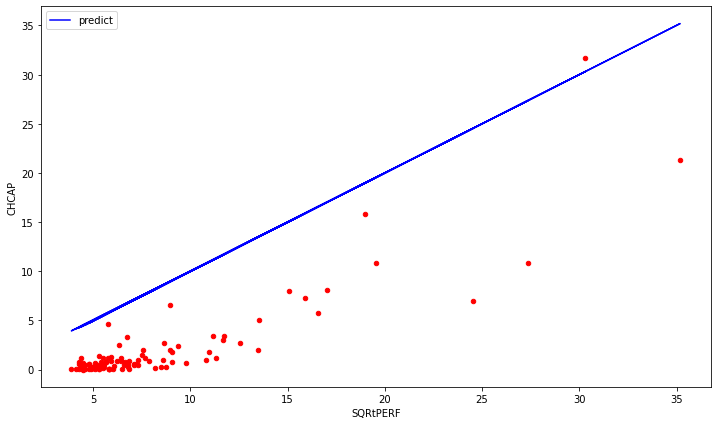

In [ ]:
# GRÁFICAS 
df_test = df_train.loc[:,['MAVG','CACH','CHCAP','SQRtPERF']] 

predict = model.predict(df_test)


line_scatter = df_test
line_scatter['predict'] = predict


for i in range(len(df_test)):
    pre = predict.iloc[i]
    act = df_train['SQRtPERF'].iloc[i]
    print('> predicted = '+ str(pre) + ',    actual = '+ str(act))


lin = line_scatter.plot.line(x='SQRtPERF',y='predict',color = 'b')
line_scatter.plot.scatter(x='SQRtPERF',y='MAVG',color = 'r',ax = lin,figsize = (12,7))

lin1 = line_scatter.plot.line(x='SQRtPERF',y='predict',color = 'b')
line_scatter.plot.scatter(x='SQRtPERF',y='CACH',color = 'r',ax = lin1,figsize = (12,7))

lin2 = line_scatter.plot.line(x='SQRtPERF',y='predict',color = 'b')
line_scatter.plot.scatter(x='SQRtPERF',y='CHCAP',color = 'r',ax = lin2,figsize = (12,7))



# REGRESIÓN KNN

A continuación, se presenta el método de aproximación no paramétrico basado en la técnica de los k-vecinos más cercanos (K-NN), en esta técnica se calculan las predicciones con base a valores cualitativos como lo puede ser una etiqueta. Para la regresión KNN se debe predecir con base a valores cuantitativos.

El en siguiente código se presenta el método KNN visto en clase con las modificaciones necesarias para el cálculo de las predicciones.

In [ ]:
import pandas as pd
import random
import math

#Lee el archivo .csv
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/machine3.csv')
l = df.values.tolist() #lo convertimos a tipo lista

# Creamos listas vacíaspara el conjunto de test y el conjunto de entrenamiento
test_set = []
training_set = []
approx_training_perc = 0.5 #porcentaje de datos a utilizar para el entrenamiento

# separa, aleatoriamente, un conjunto de instancias como el conjunto entrenamiento
# y el resto, será un conjunto de pruebas
for instance in l:
  if random.random() < approx_training_perc:
    training_set.append(instance)
  else: 
    test_set.append(instance)

# calcula la distancia euclidiana entre dos instancias
def euclidian_distance(instance1, instance2, axes):
    dist = 0
    for x in range(axes):
        dist += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(dist)

# obtiene los K vecinos mas cercanos
def get_neighbors(training_set, test_instance, k):
    distances = []
    axes = 3
    for training_instance in training_set:
        dist = euclidian_distance(test_instance, training_instance, axes)
        distances.append((dist, training_instance))
    distances.sort()
    neighbors = []
    for i in range(k):
        neighbors.append(distances[i][1])
    return neighbors

# Toma la decisión
import operator
def take_decision(neighbors):
    class_votes = 0
    for neighbor in neighbors:
        class_votes+=neighbor[-1]
        sum = class_votes
        deci = sum/len(neighbors)
    return deci

# Calcular las predicciones
predictions=[]
k = 3
for instance in test_set:
    neighbors = get_neighbors(training_set, instance, k)
    result = take_decision(neighbors)
    predictions.append(result)
    print('> predicted=' + str(result) + ',              actual=' + str(instance[-1])) #Imprime en pantalla las predicciones



> predicted=15.113232233333335,              actual=15.90597372
> predicted=18.245891099999998,              actual=19.5192213
> predicted=18.245891099999998,              actual=19.5192213
> predicted=18.245891099999998,              actual=27.36786437
> predicted=17.157333806666667,              actual=35.18522417
> predicted=4.864596831666667,              actual=4.795831523
> predicted=9.719859670666667,              actual=8.366600265
> predicted=4.119421573333333,              actual=3.8729833460000003
> predicted=8.235256246666667,              actual=8.0
> predicted=5.3050114573333325,              actual=4.795831523
> predicted=5.258562314333334,              actual=5.385164807000001
> predicted=4.653660971,              actual=4.69041576
> predicted=5.79466904,              actual=5.916079783
> predicted=5.999614104333333,              actual=6.244997998
> predicted=6.365429901,              actual=6.708203932000001
> predicted=4.887539354333334,              actual=4.5825756

# CONCLUSIONES

Se puede observar que los modelos aquí presentados en general son buenos. En el modelo de regresión knn, la predicción siempre va a depender de que tan lejos están los vecinos. En el de regresión lineal múltiple este problema no se presenta, por lo que podemos pensar que este último es un poco mejor que el de regresión knn, pero conviene recordar que todo depende del problema a resolver y del conjunto de datos.
Una de las claras ventajas que tiene el modelo de regresión lineal multiple respecto al de regresión KNN, por lo menos el presentado aquí, es la fácil implementación e interpretabilidad.  
